In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('bank-additional-full.csv',sep=';')
data.drop(['pdays','duration'], axis = 1, inplace = True)

data['Y']=(data['y']=='yes').astype(int)
data.drop('y', axis = 1, inplace = True)

In [2]:
datatype = dict(data.dtypes)
catego_val = []
numerical_val = []
for key, item in datatype.items():
    if item == 'object':
        catego_val.append(key)
    else:
        numerical_val.append(key)

print (len(catego_val), catego_val)

10 ['loan', 'contact', 'month', 'poutcome', 'housing', 'day_of_week', 'default', 'marital', 'education', 'job']


In [3]:
from sklearn.preprocessing import StandardScaler

normal_val = ['emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m','nr.employed']

scale = StandardScaler()
normalized = scale.fit_transform(data[normal_val])

normalized_data = pd.DataFrame.from_dict(normalized)
normalized_data.columns = normal_val

In [4]:
dummy_data_noduration = pd.get_dummies(data=data, columns = catego_val)
dummy_data_noduration.columns
#since housing_unknown is completely identical as loan_unknown
dummy_data_noduration.drop('housing_unknown', axis = 1, inplace = True)

In [5]:
data_noduration_X = data.drop('Y', axis = 1)
data_noduration_Y = data['Y']

In [6]:
dummy_data_noduration_X = dummy_data_noduration.drop('Y', axis = 1)
dummy_data_noduration_Y = dummy_data_noduration['Y']

In [7]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(dummy_data_noduration_X, dummy_data_noduration_Y , test_size=0.2, random_state=42)

In [8]:
from sklearn.cross_validation import KFold
kfolds = KFold(train_features.shape[0], n_folds = 5)

/Users/zhoukarren/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# defines a classification tree
def NBClassifier(X_train,y_train,X_test,y_test, auc):
    NB = GaussianNB()
    NB.fit(X_train,y_train)
    if (auc==0):
        cm = confusion_matrix(NB.predict(X_test),y_test)
        return cm,NB # (cm[0][0]+cm[1][1])/float(sum(cm))
    else:
        return roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])
    
cm,NB = NBClassifier(train_features, train_target,test_features, test_target,0)

In [10]:
from sklearn.neural_network import MLPClassifier

# defines a classification tree
def NNClassifier(X_train,y_train,X_test,y_test, auc):
    NN = MLPClassifier(hidden_layer_sizes=(30, ),learning_rate='adaptive', random_state=43)
    NN.fit(X_train,y_train)
    if (auc==0):
        cm = confusion_matrix(NN.predict(X_test),y_test)
        return cm,NN # (cm[0][0]+cm[1][1])/float(sum(cm))
    else:
        return roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])
cm,NN  = NNClassifier(train_features,train_target,test_features,test_target, 0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# defines a classification tree
def KNNClassifier(X_train,y_train,X_test,y_test, auc):
    KNN = KNeighborsClassifier(n_neighbors=15)
    KNN.fit(X_train,y_train)
    if (auc==0):
        cm = confusion_matrix(KNN.predict(X_test),y_test)
        return cm,KNN # (cm[0][0]+cm[1][1])/float(sum(cm))
    else:
        return roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])
cm,KNN = KNNClassifier(train_features,train_target,test_features,test_target, 0)

In [12]:
from sklearn import svm

# defines a classification tree
def SVMClassifier(X_train,y_train,X_test,y_test, auc):
    SVM = svm.SVC(C=1.0, kernel='rbf', probability=True)
    SVM.fit(X_train,y_train)
    if (auc==0):
        cm = confusion_matrix(SVM.predict(X_test),y_test)
        return cm,SVM # (cm[0][0]+cm[1][1])/float(sum(cm))
    else:
        return roc_auc_score(y_test,clf.decision_function(X_test))
cm,SVM = SVMClassifier(train_features,train_target,test_features,test_target, 0)

In [13]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model no training data
XGB = XGBClassifier()
XGB.fit(train_features, train_target)

# make predictions for test data
xgboost_pred = XGB.predict(test_features)
predictions = [round(value) for value in xgboost_pred]

# evaluate predictions
accuracy = accuracy_score(test_target, xgboost_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.86%


In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt

# Create linear regression object
LR = linear_model.LogisticRegression()

# Train the model using the training sets
LR.fit(train_features, train_target)

# Make predictions using the testing set
predict_y = LR.predict(test_features)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# We'll build a RF and compare to a DT
DT = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 20)
DT = DT.fit(train_features, train_target)
# dt_pred = clf_def.predict_proba(test_features)
dt_pred = DT.predict(test_features)

RF = RandomForestClassifier(criterion='entropy', n_estimators=100)
RF = RF.fit(train_features, train_target)
# rf_pred = rf_def.predict_proba(test_features)
rf_pred = RF.predict(test_features)

# Evaluation with general model selection

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          paint=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    if paint:
        plt.figure()
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
    return cm

In [17]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error,r2_score
import itertools
# lr_grid_search, knn_grid_search,nn_grid_search,dt_grid_search
# test set features and labels

test_X = test_features
test_Y = test_target 

models = [NB, NN, KNN, SVM,LR,DT,RF,XGB]
modelsName = ["NB", "NN", "KNN", "SVM","LR","DT","RF","XGB"]

profit_matrix = [[0,-1],[-10,99]]
profit_list = list()


for m,n in zip(models, modelsName):
    predict_y = m.predict(test_X)
    # The mean squared error
    print("Model: " + str(n) + "-------------------------------------")
    print("Mean squared error: %.4f" % mean_squared_error(test_Y, predict_y))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.4f' % r2_score(test_Y, predict_y))
    # The f1 score
    print("F1 score:%0.4f" % f1_score(test_Y, predict_y))
    # Precision
    print("Precision:%0.4f" % precision_score(test_Y, predict_y,average='weighted'))
    # Confusion matrix
    cnf_matrix = confusion_matrix(test_Y, predict_y)
    cm = plot_confusion_matrix(cnf_matrix, classes=['no', 'y'], normalize=False, title='Confusion matrix for '+str(n), paint=True)
    profit_list.append(np.multiply(cm, profit_matrix).sum())

print("The profit expection for each model is :",profit_list)
print("done")


Model: NB-------------------------------------
Mean squared error: 0.1688
Variance score: -0.6911
F1 score:0.4169
Precision:0.8697
Confusion matrix, without normalization
[[25401  3844]
 [ 1717  1988]]
Model: NN-------------------------------------
Mean squared error: 0.1107
Variance score: -0.1097
F1 score:0.3679
Precision:0.8693
Confusion matrix, without normalization
[[28239  1006]
 [ 2643  1062]]
Model: KNN-------------------------------------
Mean squared error: 0.0999
Variance score: -0.0011
F1 score:0.3849
Precision:0.8820
Confusion matrix, without normalization
[[28628   617]
 [ 2675  1030]]
Model: SVM-------------------------------------
Mean squared error: 0.0958
Variance score: 0.0403
F1 score:0.3706
Precision:0.8895
Confusion matrix, without normalization
[[28865   380]
 [ 2776   929]]
Model: LR-------------------------------------
Mean squared error: 0.1008
Variance score: -0.0096
F1 score:0.3037
Precision:0.8812
Confusion matrix, without normalization
[[28906   339]
 [ 29

In [29]:
def plot_roc(model, name):
    scores = model.predict_proba(test_features)[:,1]
    fpr, tpr, thresholds = roc_curve(test_target, scores)
    roc_auc = auc(fpr, tpr)   
    plt.plot(fpr, tpr, lw=2, alpha=1,
             label='ROC %s (AUC = %0.4f)' % (name, roc_auc))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

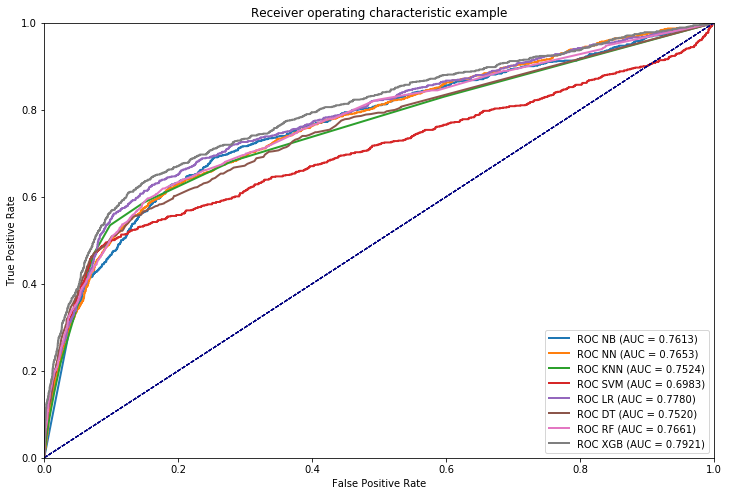

In [31]:
plt.gcf().clear()
plt.figure(figsize=(12,8))

for m,n in zip(models, modelsName):
    plot_roc(m, n)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

plt.show()